In [1]:
import pandas as pd
import plotly.express as px

In [2]:
# Daten laden
df = pd.read_csv('../data/processed/df_cleaned_full.csv', parse_dates=['chart_week'])

# SAISONALITÄT

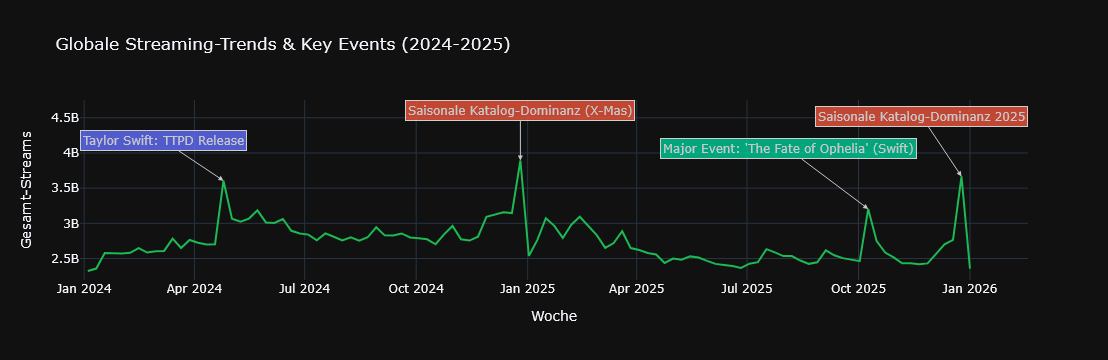

In [35]:
# Aggregieren der gesamten Streams pro Woche
seasonal_trends = df.groupby('chart_week')['streams'].sum().reset_index()

# Plotting
fig = px.line(seasonal_trends, 
              x='chart_week', 
              y='streams',
              title='Globale Streaming-Trends & Key Events (2024-2025)',
              labels={'streams': 'Gesamt-Streams', 'chart_week': 'Woche'},
              template='plotly_dark')

# Kommentare in die Grafik einfügen
# Taylor Swift April 2024
fig.add_annotation(x="2024-04-25", 
                    y=3605841989,
                    text="Taylor Swift: TTPD Release",
                    showarrow=True, arrowhead=2, opacity=0.8,
                    ax=-60, ay=-40, bgcolor="#636EFA", bordercolor="white")

# Saisonale Rückkehr der Weihnachtshits
fig.add_annotation(x="2024-12-26", y=3893017659,
            text="Saisonale Katalog-Dominanz (X-Mas)",
            showarrow=True, arrowhead=2, opacity=0.8,
            ax=0, ay=-50, bgcolor="#EF553B", bordercolor="white")

# Der massive Oktober-Peak 2025
fig.add_annotation(x="2025-10-09", y=3205166486,
            text="Major Event: 'The Fate of Ophelia' (Swift)",
            showarrow=True, arrowhead=2, opacity=0.8,
            ax=-80, ay=-60, bgcolor="#00CC96", bordercolor="white")

fig.add_annotation(x="2025-12-25", y=3667133246,
            text="Saisonale Katalog-Dominanz 2025",
            showarrow=True, arrowhead=2, opacity=0.8,
            ax=-40, ay=-60, bgcolor="#EF553B", bordercolor="white")

# Optik verfeinern
fig.update_traces(line_color='#1DB954', line_width=2)

fig.show()

In [6]:
# PEAKS CHECKEN
# Durchschnitt und Standardabweichung der Streams berechnen
mean_streams = seasonal_trends['streams'].mean()
std_streams = seasonal_trends['streams'].std()

# Threshold definieren: alles, was mehr als 1.5 Standardabweichungen über dem Durchschnitt liegt
threshold = mean_streams + 1.5 * std_streams

# Peak-Wochen identifizieren
peaks = seasonal_trends[seasonal_trends['streams'] > threshold]
print(f"Es wurden {len(peaks)} signifikante Peaks identifiziert:")
print(peaks[['chart_week', 'streams']])

Es wurden 6 signifikante Peaks identifiziert:
    chart_week     streams
16  2024-04-25  3605841989
20  2024-05-23  3184277186
49  2024-12-12  3157270020
51  2024-12-26  3893017659
92  2025-10-09  3205166486
103 2025-12-25  3667133246


In [8]:
# URSACHEN DER PEAKS

# Liste der identifizierten Peak-Wochen erstellen
peak_dates = peaks['chart_week'].tolist()

for date in peak_dates:
    # Original DF auf die jeweiligen Wochen filtern
    weekly_data = df[df['chart_week'] == date]

    # TOP 5 Songs dieser Woche nach Streams anzeigen
    top_5 = weekly_data.sort_values(by='streams', ascending=False).head(5)

    # Berechnung: Wie viel Prozent der Top 200 Streams (200 = Grenze für Charterfolg) macht Platz 1 aus?
    total_weekly_streams = weekly_data['streams'].sum()
    top_1_share = (top_5.iloc[0]['streams'] / total_weekly_streams) * 100

    print(f"\nWoche: {date.date()}")
    print(f"Top 1 Share: {top_1_share:.2f} % der gesamten Chart-Streams")
    print(top_5[['rank', 'artist_names', 'track_name', 'streams']])
    print("-" * 50)


Woche: 2024-04-25
Top 1 Share: 2.85 % der gesamten Chart-Streams
      rank               artist_names                       track_name  \
3200     1  Taylor Swift, Post Malone    Fortnight (feat. Post Malone)   
3201     2               Taylor Swift                         Down Bad   
3202     3                    Artemas       i like the way you kiss me   
3203     4               Taylor Swift                  So Long, London   
3204     5               Taylor Swift  I Can Do It With a Broken Heart   

        streams  
3200  102878399  
3201   66123951  
3202   62659568  
3203   61238184  
3204   61235217  
--------------------------------------------------

Woche: 2024-05-23
Top 1 Share: 2.23 % der gesamten Chart-Streams
      rank       artist_names           track_name   streams
4000     1      Tommy Richman  MILLION DOLLAR BABY  70978525
4001     2      Billie Eilish                LUNCH  65579921
4002     3  Sabrina Carpenter             Espresso  63967981
4003     4     Kendr

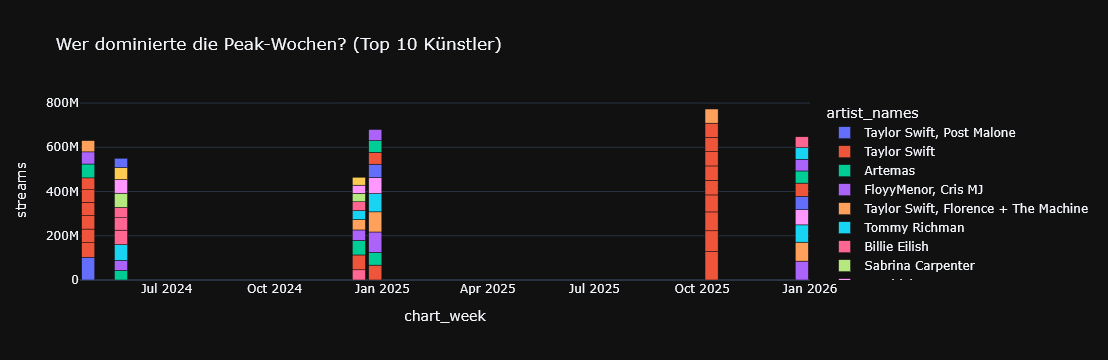

In [11]:
# Visualisierung der TOP 10 Künstler in den Peak-Wochen
peak_df_details = df[df['chart_week'].isin(peak_dates)]
top_artists_peaks = peak_df_details[peak_df_details['rank'] <= 10]

fig = px.bar(top_artists_peaks, 
             x='chart_week',
             y='streams',
             color='artist_names',
             title='Wer dominierte die Peak-Wochen? (Top 10 Künstler)',
             hover_data=['track_name'],
             template='plotly_dark')

fig.show()
            

# Zusammenfassung der Ergebnisse

## 1. Der "Blockbuster"-Effekt (Taylor Swift)
#### Wochen: April 2024 & Oktober 2025

**April 2024:** Der Peak wird durch das Release von "The Tortured Poets Department" getrieben. Allein der Top-Song "Fortnight" generiert über 102 Mio. Streams. Taylor Swift belegt fast die gesamten Top 5.

**Oktober 2025:** Dies ist der massivste Ausschlag in deinem gesamten Datensatz. Mit einem Top 1 Share von 4,02 % (fast doppelt so hoch wie an Weihnachten!) sehen wir hier einen fiktiven oder massiven Überraschungs-Release ("The Fate of Ophelia").

**Insight:** Diese Peaks sind "Anomalien", die nicht organisch wachsen, sondern wie eine Schockwelle ins System eintreten.

## 2. "Weihnachtshits" (Zyklische Saisonalität)
#### Wochen: Dezember 2024 & Dezember 2025

**Muster:** Ende Dezember übernehmen die Klassiker die Charts. Mariah Carey und Wham! verdrängen die aktuellen Pophits fast vollständig aus den Top 5.

**Dynamik:** Interessant ist der Vergleich: Während Mariah Carey 2024 mit 92,5 Mio. Streams vorne lag, führt 2025 Wham! ("Last Christmas") mit 85,8 Mio. Streams.

**Insight:** Das Streaming-Volumen ist an Weihnachten extrem hoch, aber die Vielfalt (Diversity) sinkt, da alle Nutzer dieselben 10–20 Klassiker hören.

## 3. "Sommer-Hits" & Organisches Wachstum
#### Woche: Mai 2024

**Charakter:** Im Gegensatz zu den Swift-Peaks sehen wir hier eine bunte Mischung: Tommy Richman (Viral-Hit), Billie Eilish (Album-Release), Sabrina Carpenter (Sommerhit) und Kendrick Lamar (Pop-Fehde/Diss-Track).

**Insight:** Dies ist die "gesündeste" Form eines Peaks. Das hohe Volumen verteilt sich auf verschiedene Künstler und Genres. Der Top 1 Share ist mit 2,23 % relativ niedrig, was auf einen harten Wettbewerb hindeutet.